In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/laptop_data.csv')
print("RAW DATA")
print(df.head())
print("\nDATA INFO")
print(df.info())

if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype(float)

print("\nCLEANED DATA")
print(df.head())
avg_price_by_brand = df.groupby('Company')['Price'].mean().sort_values(ascending=False).head(5)
correlation = df['Ram'].corr(df['Price'])

print("\nTop 5 Expensive Brands:")
print(avg_price_by_brand)
print(f"\nCorrelation between RAM and Price: {correlation}")
df.to_csv('cleaned_laptop_data.csv', index=False)
print("\nSuccess! Cleaned file")

RAW DATA
   Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphic

CORRELATION MATRIX
          Inches       Ram    Weight     Price
Inches  1.000000  0.237993  0.827631  0.068197
Ram     0.237993  1.000000  0.383874  0.743007
Weight  0.827631  0.383874  1.000000  0.210370
Price   0.068197  0.743007  0.210370  1.000000

Success


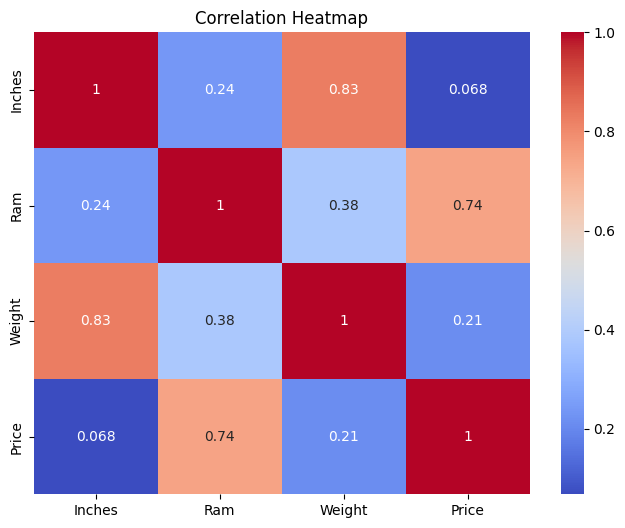

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

print("CORRELATION MATRIX")
print(corr_matrix)

corr_matrix.to_csv('correlation_matrix.csv')
print("\nSuccess")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()